## Suggestion:

<b> If you observe that this jupyter notebook is not loading properply please follow these following steps: <b>

1. Go to : https://nbviewer.jupyter.org/
2. Here you will see a box, where it is writen "Enter the location of a Jupyter Notebook to have it rendered here:"
3. Into that box, please paste the URL of this notebook.

NB: you can copy the URL from the browser address bar, and then paste it there (step3)

## Purpose

Sometimes it might happen that we considered only precision score from the computed model. We saved the confusion matrix for multiclass, and we have calculated the precision score. However, after some time, you might be needing to calculate the Recall, and F1 score from that confusion matrix. 

It is possible to calculate through the equations. You can easily see the description of precision, recall and F1 score from this link: https://en.wikipedia.org/wiki/Precision_and_recall. However, for multiclass classification, it is often very tough to back calculate all the things.

So in this code, I have attempted to find out a way to calculate all the measurement paramters from the confusion matrix. You just need to provide the confusion matrix to the code, and it will calculate the rest for you.

## lets start

In [15]:
import numpy as np

In [16]:
# input the row of the predicted values
cc = np.array([[48,1,0],[2,86,24],[4,36,181]])
# input the label names
labels = ['Normal', 'Micro', 'Macro']
# you can put any size. 
# Here in this example we have put 3X3. You can use it for any dimenion, NXN, where N = 2 to your desired number

In [17]:
# score calculate

In [18]:
# recall score
recall = np.diag(cc) / np.sum(cc, axis = 1) # axis 1 means column values
print(recall)

[0.97959184 0.76785714 0.81900452]


In [19]:
# mean of recall
mr = np.mean(recall)
print(mr)

0.855484501492905


In [20]:
# precision score
precision = np.diag(cc) / np.sum(cc, axis = 0) # axis 0 means row values
print(precision)

[0.88888889 0.69918699 0.88292683]


In [21]:
# mean of precision
mr = np.mean(recall)
print(mr)

0.855484501492905


In [22]:
# F1 score
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

[0.93203883 0.73191489 0.84976526]


In [23]:
# mean of F1 score
mf = np.mean(F1)
print(mf)

0.8379063289281468


In [24]:
# plot the confusion matrix
# Plot function
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
    
    plt.figure(3)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('confusion_matrix.pdf', bbox_inches='tight')
    pass

<Figure size 432x288 with 0 Axes>

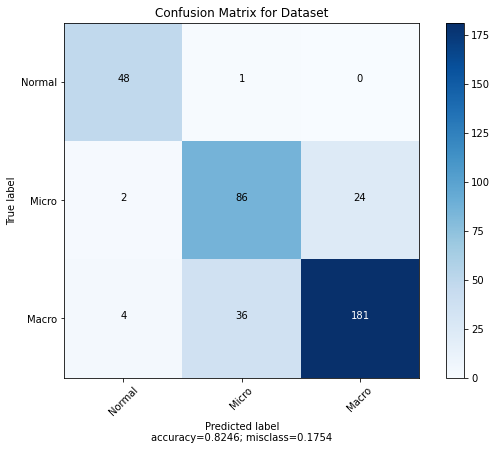

In [25]:
plot_confusion_matrix(cm = cc, 
                      normalize    = False,
                      target_names = labels,
                      title        = "Confusion Matrix for Dataset")